# Successive overrelaxation

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## The 2D case

In [2]:
def sor_2d(rho, maxerr=1.0E-8, maxiter=100, w=None):
    r"""Solve the 2D Poisson equation using the successive overrelaxation method.

    Parameters
    ----------
    rho : numpy.ndarray(shape=(n, n))
        The charge density grid.
    maxerr : float, optional, default=1.eE-8
        The convergence criterion.
    maxiter : int, optional, default=1000
        The number of iterations.
    w : float, optional, default=None
        Overwrite the automatically computed SOR parameter.

    Returns
    -------
    numpy.ndarray(shape=rh,shape, dtype=rho.dtype)
        The potential grid.

    """
    if rho.ndim != 2 or rho.shape[0] != rho.shape[1]:
        raise ValueError("rho must be of shape=(n, n)")
    phi = np.zeros(shape=rho.shape, dtype=rho.dtype)
    nx, ny = rho.shape
    if w is None:
        w = 2.0 / (1.0 + np.pi / float(nx))
    errors = []
    for iteration in range(maxiter):
        error = 0.0
        for x in range(nx):
            for y in range(ny):
                if (x + y) % 2 == 0: continue
                phi_xy = (
                    phi[(x - 1) % nx, y] + \
                    phi[(x + 1) % nx, y] + \
                    phi[x, (y - 1) % ny] + \
                    phi[x, (y + 1) % ny] + \
                    rho[x, y]) / 4.0
                phi[x, y] = (1.0 - w) * phi[x, y] + w * phi_xy
                error += (phi[x, y] - phi_xy)**2
        for x in range(nx):
            for y in range(ny):
                if (x + y) % 2 != 0: continue
                phi_xy = (
                    phi[(x - 1) % nx, y] + \
                    phi[(x + 1) % nx, y] + \
                    phi[x, (y - 1) % ny] + \
                    phi[x, (y + 1) % ny] + \
                    rho[x, y]) / 4.0
                phi[x, y] = (1.0 - w) * phi[x, y] + w * phi_xy
                error += (phi[x, y] - phi_xy)**2
        errors.append(np.sqrt(error))
        if error < maxerr:
            print("convergence reached after %d steps! error: %.e" % (iteration + 1, error))
            return phi, errors
    raise RuntimeError("not converged after %d steps! last error: %e" % (maxiter, error))

convergence reached after 71 steps! error: 9e-09


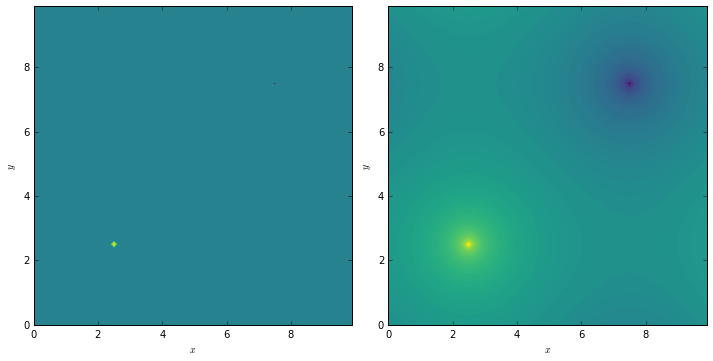

In [3]:
n = 100
g = np.linspace(0.0, 10.0, n, endpoint=False)
xx, yy = np.meshgrid(g, g, indexing="ij")

rho = np.zeros(shape=(n, n), dtype=np.float64)
rho[25, 25] = 1.0
rho[75, 75] = -1.0

phi, error = sor_2d(rho * (g[1] - g[0])**2)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].contourf(xx, yy, rho, cmap=mpl.cm.viridis)
axes[1].contourf(xx, yy, phi, np.linspace(phi.min(), phi.max(), 100), cmap=mpl.cm.viridis)
for ax in axes.flat:
    ax.set_aspect("equal")
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
fig.tight_layout()

## The 3D case

In [4]:
def sor_3d(rho, maxerr=1.0E-8, maxiter=100, w=None):
    r"""Solve the 3D Poisson equation using the successive overrelaxation method.
    
    Parameters
    ----------
    rho : numpy.ndarray(shape=(n, n, n))
        The charge density grid.
    maxerr : float, optional, default=1.eE-8
        The convergence criterion.
    maxiter : int, optional, default=1000
        The number of iterations.
    w : float, optional, default=None
        Overwrite the automatically computed SOR parameter.
    
    Returns
    -------
    numpy.ndarray(shape=rh,shape, dtype=rho.dtype)
        The potential grid.
    
    """
    if rho.ndim != 3 or rho.shape[0] != rho.shape[1] != rho.shape[2]:
        raise ValueError("rho must be of shape=(n, n, n)")
    phi = np.zeros(shape=rho.shape, dtype=rho.dtype)
    nx, ny, nz = rho.shape
    if w is None:
        w = 2.0 / (1.0 + np.pi / float(nx))
    errors = []
    for iteration in range(maxiter):
        error = 0.0
        for x in range(nx):
            for y in range(ny):
                for z in range(nz):
                    if (x + y + z) % 2 == 0: continue
                    phi_xyz = (
                        phi[(x - 1) % nx, y, z] + \
                        phi[(x + 1) % nx, y, z] + \
                        phi[x, (y - 1) % ny, z] + \
                        phi[x, (y + 1) % ny, z] + \
                        phi[x, y, (z - 1) % nz] + \
                        phi[x, y, (z + 1) % nz] + \
                        rho[x, y, z]) / 6.0
                    phi[x, y, z] = (1.0 - w) * phi[x, y, z] + w * phi_xyz
                    error += (phi[x, y, z] - phi_xyz)**2
        for x in range(nx):
            for y in range(ny):
                for z in range(nz):
                    if (x + y + z) % 2 != 0: continue
                    phi_xyz = (
                        phi[(x - 1) % nx, y, z] + \
                        phi[(x + 1) % nx, y, z] + \
                        phi[x, (y - 1) % ny, z] + \
                        phi[x, (y + 1) % ny, z] + \
                        phi[x, y, (z - 1) % nz] + \
                        phi[x, y, (z + 1) % nz] + \
                        rho[x, y, z]) / 6.0
                    phi[x, y, z] = (1.0 - w) * phi[x, y, z] + w * phi_xyz
                    error += (phi[x, y, z] - phi_xyz)**2
        errors.append(np.sqrt(error))
        if error < maxerr:
            print("convergence reached after %d steps! error: %.e" % (iteration + 1, error))
            return phi, errors
    raise RuntimeError("not converged after %d steps! last error: %e" % (maxiter, error))

convergence reached after 18 steps! error: 9e-09


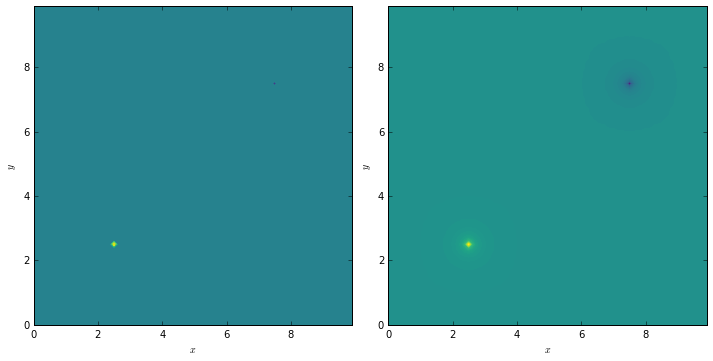

In [5]:
n = 100
g = np.linspace(0.0, 10.0, n, endpoint=False)
xx, yy = np.meshgrid(g, g, indexing="ij")

rho = np.zeros(shape=(n, n, n), dtype=np.float64)
rho[25, 25, 50] = 1.0
rho[75, 75, 50] = -1.0

phi, error = sor_3d(rho * (g[1] - g[0])**3)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].contourf(xx, yy, rho[:, :, 50], cmap=mpl.cm.viridis)
axes[1].contourf(xx, yy, phi[:, :, 50], np.linspace(phi.min(), phi.max(), 100), cmap=mpl.cm.viridis)
for ax in axes.flat:
    ax.set_aspect("equal")
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
fig.tight_layout()